In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as fig
from plotnine import *
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import patsy

# APS Python para Ciência de Dados - Grupo 1

O estudo e a investigação de acidentes aeronáuticos é de grande importância para aprimorar ao máximo a segurança de voo para passageiros e pilotos. O Brasil é o quarto país com maior número de acidentes aéreos fatais desde 1945, com quase 190 ocorrências. Apenas em 2021 o país registrou 111 acidentes com aeronaves de pequeno porte, segundo a Aviation Safety Network, uma plataforma colaborativa mantida pela ONG internacional Flight Safety Foundation. 

O país é o segundo maior em número de aeroportos do mundo, com 2.717 terminais, sendo 2 mil deles privados. Em relação aos aeroportos que operam voo regularmente o número é bem menor, sendo somente 134 deles. No que diz respeito ao tamanho da frota, o Brasil também se encontra no segundo lugar, com mais de 15 mil aeronaves, ficando atrás apenas dos EUA. As causas mais comuns de acidentes são aquelas ligadas ao fator operacional, seguida do fator humano. 

Referências:

https://www.poder360.com.br/brasil/brasil-teve-111-acidentes-com-aeronaves-de-pequeno-porte-em-2021/

https://www.statista.com/statistics/262867/fatal-civil-airliner-accidents-since-1945-by-country-and-region/

https://www2.fab.mil.br/cenipa/index.php/investigacoes#:~:text=A%20investiga%C3%A7%C3%A3o%20de%20acidente%20aeron%C3%A1utico,voo%2C%20seja%20militar%20ou%20civil.

https://www.melhoresdestinos.com.br/aeroportos-mundo.html

https://www.bloomberglinea.com.br/2021/11/15/por-que-tantos-avioes-privados-caem-no-brasil/



# ACIDENTES AERONAVES

In [ ]:
contrib=pd.read_excel('fator_contribuinte.xlsx') #Como
aeronave=pd.read_excel('aeronave.xlsx') #Como + o quê
tipo_ocorrencia=pd.read_excel('ocorrencia_tipo.xlsx') #O quê
ocorrencia=pd.read_excel('ocorrencia.xlsx') #Como + o quê

# TIPO OCORRÊNCIA: Diz o que aconteceu na aeronave

In [ ]:
tipo_ocorrencia.info()

In [ ]:
tipo_ocorrencia.head()

# OCORRÊNCIA: DF "principal", tem mortes e informações geográficas do acidente, além de colunas "codigo_ocorrencia" que podem ser usadas p/ merge

In [ ]:
ocorrencia.info()

In [ ]:
ocorrencia.head()

In [ ]:
# Removendo variáveis irrelevantes para a análise
ocorrencia=ocorrencia.drop(columns=['ocorrencia_latitude','ocorrencia_longitude',
                                    'divulgacao_relatorio_numero','divulgacao_dia_publicacao',
                                   'investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_publicado',
                                   'divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao',
                                   'total_recomendacoes'])

#### Se houver morte ou destruição, é acidente. 

In [ ]:
ocorrencia['ocorrencia_classificacao'].value_counts().reset_index()

# AERONAVE: Descreve as características da aeronave que sofreu a ocorrência

In [ ]:
aeronave.head()

In [ ]:
aeronave.info()

In [ ]:
# Removendo dados inútei para a análise
aeronave=aeronave.drop(columns=['aeronave_matricula','aeronave_pmd',
                                'aeronave_pmd_categoria','aeronave_tipo_icao'])

# CONTRIBUINTE: Fatores que contribuiram para que o acidente ocorra

In [ ]:
contrib.info()

In [ ]:
contrib.head()

# ANALISAR CAUSAS + DESCREVER O QUE OCORRE EM ACIDENTES

## CAUSAS:
### Dividido em aeronave e fatores contribuintes
## O QUE OCORRE EM ACIDENTES:
### Utilizar dados sobre fatalidades, danos à aeronave etc...
## MODELO PREDITIVO: CLASSIFICAÇÃO

# ANÁLISE DAS AERONAVES QUE SOFRERAM OS ACIDENTES

#### DFs a serem utilizados: aeronave, tipo_ocorrencia e ocorrencia

In [ ]:
#Junção
df=pd.merge(aeronave,ocorrencia,on='codigo_ocorrencia2')
df=df.merge(tipo_ocorrencia,on='codigo_ocorrencia1')

#### AERONAVE E SUAS CARACTERÍSTICAS

###### Pode-se observar que aeronaves com motor de pistão e de pequeno porte são aquelas mais envolvidas em ocorrências. O primeiro gráfico indica claramente que aviões - sejam bimotores ou monomotores - são a categoria mais frequente  de aeronave nas ocorrências. Entretanto, é necessário considerar que aviões são, em geral, as aeronaves tripuladas mais utilizadas, de forma que sua recorrência possa estar inflacionada.

In [ ]:
# Qual o tipo de aeronave?
aeronave['aeronave_tipo_veiculo'].value_counts().reset_index().head(7).pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_tipo_veiculo)",y="aeronave_tipo_veiculo",fill='index'))+
        geom_col()+
        coord_flip()+
        labs(title='',x='',y='Frequência'))

In [ ]:
# Qual o motor de aeronave?
aeronave['aeronave_motor_tipo'].value_counts().reset_index().pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_motor_tipo)",y="aeronave_motor_tipo",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='',x='',y='Frequência')+
        theme(legend_position = "none"))

In [ ]:
# Qual a quantidade de motores?
aeronave['aeronave_motor_quantidade'].value_counts().reset_index().pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_motor_quantidade)",y="aeronave_motor_quantidade",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Acidentes por tipo de motor',x="",y="Frequência") +
        theme(legend_position = "none"))

In [ ]:
# Qual a quantidade de assentos?
aeronave.dropna(subset=['aeronave_assentos']).pipe(lambda _:ggplot(_,aes(x='aeronave_assentos'))+
        geom_histogram(alpha=0.7,fill='blue',bins=20)+
        labs(title='Tamanho X Qtd. de ocorrências',x='Qtd. de assentos',y='Frequência') +
        theme(legend_position = "none"))

In [ ]:
# Aviões bimotores ou monomotores?
a=aeronave.loc[aeronave.aeronave_tipo_veiculo=='AVIÃO',['aeronave_motor_quantidade']].value_counts().reset_index()
a.columns=['Qtd. de motores no avião','Freq']
a

#### IDADE E FABRICANTES

###### Como se pode observar, as aeronaves mais recentes estão concentradas em valores menores, indicando melhora na fabricação. Entretanto, é necessário considerar que aeronaves mais antigas terão realizado mais viagens, estando mais sujeitas a possuírem maior número de ocorrências. Para aquelas fabricadas antes de 1975, é válido pontuar que viagens de aeronaves não eram tão comuns como atualmente, de forma que sua recorrência pode estar deflacionada.
###### Parece existir certa concentração do número de ocorrências nos 9 primeiros fabricantes (de um total de 251), sendo os únicos com mais de 250 ocorrências registradas. Um elevado grau de concentração de market-share no mercado de aeronaves no Brasil poderia inflacionar os valores observados. No mais, o número de ocorrências registradas com aeronaves importadas é baixíssimo.

In [ ]:
# Qual a "idade" das aeronaves?
aeronave['aeronave_ano_fabricacao'].value_counts().reset_index().sort_values(by='index').drop([0,79]).pipe(lambda _: ggplot(_,aes(x='index',y="aeronave_ano_fabricacao"))+
        geom_point(alpha=0.7,fill='blue')+
        labs(title='Acidentes X Idade da aeronave',x='Ano de fabricação',y="Quantidade de ocorrências") +
        theme(legend_position = "none",figure_size=(6,3)))

In [ ]:
# Quais os fabricantes mais envolvidos com acidentes?
aeronave['aeronave_fabricante'].value_counts().reset_index().head(9).pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_fabricante)",y="aeronave_fabricante",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Fabricantes com ao menos 250 ocorrências registradas com suas aeronaves',x="",y="Frequência") +
        theme(legend_position = "none"))
#(aeronave['aeronave_fabricante']).value_counts().reset_index().drop(columns='aeronave_fabricante')

In [ ]:
# Quais os países mais envolvidos com acidentes?
print('Porcentagem de ocorrências com aeronaves importadas =',round(((52+12+8)/(6074+52+12+8))*100,2),'%')
aeronave['aeronave_pais_fabricante'].value_counts().reset_index().head(4)

#### O QUE COSTUMA ACONTECER COM AS AERONAVES?

###### Existem 81 formas de classificar as ocorrências de acordo com o que acontece com as aeronaves, e existem 32 taxonomias para agrupa-las.
###### Pode-se perceber que danos substanciais tendem a ser classificados na categoria acidentes, enquanto as demais categorias, responsáveis pela maior parte das ocorrências, apresentam danos leves ou nenhum dano a aeronave. Também pode-se constatar que a destruição de aeronaves são consideradas diretamente como acidentes. 
###### Outro fator importante de ser observado é que das 6 ocorrências mais comuns - falha do motor em voo, falha ou mau funcionamento de sistema/componente, estouro de pneu, perda de controle no solo, perda de controle em voo e com trem de pouso - , 5 estão altamente relacionadas com o processo de pouso, decolagem ou voo de cruzeiro.

In [ ]:
# Tipo - "Especificidade 1"
nome=tipo_ocorrencia.ocorrencia_tipo.unique().tolist()
print('(1) Qtd. de tipos de ocorrências =',len(nome))

# Categoria - "Especificidade 2"
categoria=tipo_ocorrencia.ocorrencia_tipo_categoria.unique().tolist()
print('(2) Qtd. de categorias =',len(categoria))

# Taxonomia - "Especificidade 3"
tax=tipo_ocorrencia.taxonomia_tipo_icao.unique().tolist()
print('(3) Qtd. de taxonomias =',len(tax))

In [ ]:
# Qual o dano causado em cada tipo de ocorrência?
(ggplot(df, aes(x = "aeronave_nivel_dano", fill = "aeronave_nivel_dano")) + 
     geom_bar(alpha = .75) +
     coord_flip()+
     labs(x = "", y = "Contagem", title = "Dano a aeronave") + 
     facet_wrap("~ ocorrencia_classificacao",nrow=3) +
     theme(legend_position = "none"))

In [ ]:
# Fase da operação mais problemática
a=aeronave['aeronave_fase_operacao'].value_counts().reset_index().head(4)
a.columns=['aeronave_fase_operacao','freq']
f_mais_prob=a.aeronave_fase_operacao.tolist()
aeronave['aeronave_fase_operacao'].value_counts().reset_index().head(4).pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_fase_operacao)",y="aeronave_fase_operacao",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Fases de operação mais problemáticas',x=" ",y="Frequência") +
        theme(legend_position = "none",figure_size = (5, 5)))

In [ ]:
# Ocorrências mais comuns
a=df['ocorrencia_tipo'].value_counts().reset_index().head(6)
a.columns=['ocorrencia_tipo','freq']
oc_mais_comuns=a.ocorrencia_tipo.tolist()
df['ocorrencia_tipo'].value_counts().reset_index().head(6).pipe(lambda _: ggplot(_,aes(x="reorder(index,ocorrencia_tipo)",y="ocorrencia_tipo",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Ocorrencias mais comuns',x=" ",y="Frequência") +
        theme(legend_position = "none",figure_size = (5, 5)))

In [ ]:
# O quê exatamente ocorre com a aeronave em cada tipo de ocorrência?
a=df[['ocorrencia_tipo','aeronave_fase_operacao']].query("aeronave_fase_operacao==['POUSO','DECOLAGEM','CRUZEIRO','CORRIDA APÓS POUSO']")
a=a.query("ocorrencia_tipo==['FALHA DO MOTOR EM VOO','FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE','ESTOURO DE PNEU','PERDA DE CONTROLE NO SOLO','PERDA DE CONTROLE EM VOO','COM TREM DE POUSO']")
(ggplot(a,aes(x="ocorrencia_tipo",fill='ocorrencia_tipo'))+
        geom_histogram()+
        coord_flip()+
        labs(title='Ocorrências mais comuns em fases mais problemáticas',x=" ",y="Frequência") +
        theme(legend_position = "none",figure_size=(5,5))+
        facet_wrap('~ aeronave_fase_operacao'))

# ANÁLISE DAS CAUSAS RELATADAS DOS ACIDENTES

In [ ]:
# Divisões de aspectos
contrib.filter(['fator_condicionante','fator_aspecto']).drop_duplicates().sort_values(by='fator_aspecto').reset_index()
# Divisões de áreas
#contrib.filter(['fator_condicionante','fator_area']).drop_duplicates().sort_values(by='fator_condicionante').reset_index()

In [ ]:
# Nome - "Especificidade 1"
nome=contrib.fator_nome.unique().tolist()
print('(1) Qtd. de nome de fatores =',len(nome))

# Condicionante - "Especificidade 2"
condicionante=contrib.fator_condicionante.unique().tolist()
print('(2) Qtd. de condicionante de fatores =',len(condicionante))

# Aspecto - "Especificidade 3"
aspecto=contrib.fator_aspecto.unique().tolist()
print('(3) Qtd. de aspecto de fatores =',len(aspecto))

# Área - "Especificidade 4"
area=contrib.fator_area.unique().tolist()
print('(4) Qtd. de area de fatores =',len(area))

# Excluir nomes e condicionante?

In [ ]:
# Criando o DF de cada uma das variáveis com os valores e em ordem descendente
dfa = contrib.value_counts("fator_area").to_frame("n").reset_index()
dfas = contrib.value_counts("fator_aspecto").to_frame("n").reset_index()
dfc = contrib.value_counts("fator_condicionante").to_frame("n").reset_index()
dfn = contrib.value_counts("fator_nome").to_frame("n").reset_index()

In [ ]:
df=contrib.filter(['fator_area','fator_condicionante','fator_aspecto']).drop_duplicates().sort_values(by='fator_area').reset_index()

#Categorias área
a=df['fator_area'].reset_index().drop(columns='index').value_counts().reset_index()
a.columns=['fator_area','Subcategorias']
#Categorias aspecto
b=df['fator_aspecto'].reset_index().drop(columns='index').value_counts().reset_index()
b.columns=['fator_aspecto','Subcategorias']
#Categorias condicionante
c=df['fator_condicionante'].reset_index().drop(columns='index').value_counts().reset_index()
c.columns=['fator_condicionante','Subcategorias']

In [ ]:
(dfa.assign(fator_area = lambda _: pd.Categorical(_.fator_area, _.fator_area.unique()))
    .pipe(lambda _:(ggplot(_, aes(x = "fator_area", y = "n", fill = "fator_area")) + 
                              geom_col(alpha = 0.75) +
                              labs(y = "Número de Observações", title = "Nome de Áreas Observados") +
                              theme(axis_title_x=element_blank(),
                              axis_text_x=element_blank())
                              )))

# As duas áres de fatores mais proeminentes são Fator Operacional (1 lugar) e Fator Humano (2 lugar)

In [ ]:
(dfas.assign(fator_aspecto = lambda _: pd.Categorical(_.fator_aspecto, _.fator_aspecto.unique()))
     .pipe(lambda _:(ggplot(_, aes(x = "fator_aspecto", y = "n", fill = "fator_aspecto")) + 
                              geom_col(alpha = 0.75) +
                              labs(y = "Número de Observações", title = "Nome de Aspectos Observados") +
                              theme(axis_title_x=element_blank(),
                              axis_text_x=element_blank())
                              )))


# As duas áres de fatores mais proeminentes são Desempenho do Ser Humano (1º lugar) e Aspecto Psicológico (2º lugar)

In [ ]:
(dfc.assign(fator_condicionante = lambda _: pd.Categorical(_.fator_condicionante, _.fator_condicionante.unique()))
     .pipe(lambda _:(ggplot(_, aes(x = "fator_condicionante", y = "n", fill = "fator_condicionante")) + 
                              geom_col(alpha = 0.75) +
                              labs(y = "Número de Observações", title = "Nome de Condicionantes Observados") +
                              theme(axis_title_x=element_blank(),
                              axis_text_x=element_blank())
                              )))

# Os 2 condicionantes mais observados são Operação da Aeronave e Individual

In [ ]:
(dfn.assign(fator_nome = lambda _: pd.Categorical(_.fator_nome, _.fator_nome.unique()))
    .pipe(lambda _:(ggplot(_, aes(x = "fator_nome", y = "n", fill = "fator_nome")) + 
                              geom_col(alpha = 0.75) +
                              labs(y = "Número de Observações", title = "Nome de Fatores Observados") +
                              theme(axis_title_x=element_blank(),
                              axis_text_x=element_blank())
                              )))

# Dado o grande número de variáveis, é válido fazer um corte para checar as principais. O corte proposto foi de 200 ocorrências ou mais

In [ ]:
# Cria-se um novo dataframe, já filtrado e baseado no número de observações de cada nome de fator

dfn2 = dfn[dfn.n>200]

(dfn2.assign(fator_nome = lambda _: pd.Categorical(_.fator_nome, _.fator_nome.unique()))
     .pipe(lambda _:(ggplot(_, aes(x = "fator_nome", y = "n", fill = "fator_nome")) + 
                              geom_col(alpha = 0.75) +
                              labs(y = "Número de Observações", title = "Nome de Fatores Observados") +
                              theme(axis_title_x=element_blank(),
                              axis_text_x=element_blank())
                              )))

In [ ]:
# Criados novos DFs para que, em um possívvel "merge", não há dissonância relativa ao número de observações e índice
dfa2 = dfa[dfa.n>1000]
dfas2 = dfas[dfas.n>1000]
dfc2 = dfc[dfc.n>500]


print("Os 2 condicionantes de fatores com maior ocorrência (Fator Operacional e Fator Humano) representam " + "{:.0%}".format(sum(dfa2.n)/4485) + " do total")
print("Os 2 aspectos de fatores com maior ocorrência (Desempenho do Ser Humano e Aspecto Psicológico) representam " + "{:.0%}".format(sum(dfas2.n)/4485) + " do total")
print("Os 2 condicionantes de fatores com maior ocorrência (Operação da Aeronave e Individual) representam " + "{:.0%}".format(sum(dfc2.n)/4485) + " do total")
print("Os 6 nomes de fatores com maior ocorrência representam " + "{:.0%}".format(sum(dfn2.n)/4485) + " do total")

Nota-se grande concentração relativa dos principais fatores contribuintes, não importando a variável observada. É esperado que tal concentração seja crescente conforme mais abrangente é a variável, já que uma variável mostra-se ligada à outra e, em último caso, todas são definidas pelo nome específico dos fatores observados (que, finalmente, mostram-se em grande concentração, com 6 fatores, menos de 10% do total, representando quase 50% dos casos).
Os aspectos mais recorrentes (em aproximadamente 90% do total de observações) está relacionado ao aspecto humano do processo, assim como os 6 nomes de fatores observados mais frequentes. Mesmo que expandido, como observado no gráfico e dataframe pré recorte, todos os nomes de fatores mais recorrentes estão relacionados ao fator humano da operação, desde o momento de manutenção e checagem até decolagem e pouso. Vale ressaltar que, ainda que o fator humano (segundo classificação dos dados) seja expressivo, a área mais recorrente quando observadas ocorrências aéreas seria o Fator Operacional do processo.

# ANÁLISE DAS CIDADES E TIPOS DE VOO

In [ ]:
# Quais tipos de operação de voos possuem maior acidentes?
aeronave['aeronave_tipo_operacao'].value_counts().reset_index().pipe(lambda _: ggplot(_,aes(x="reorder(index,aeronave_tipo_operacao)",y="aeronave_tipo_operacao",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Acidentes por tipo de categoria',x="Categoria",y="Frequência") +
        theme(legend_position = "none"))

In [ ]:
#Quais cidades possuem maior ocorrências?
o=ocorrencia['ocorrencia_cidade'].value_counts().reset_index().head(10)
o.value_counts().reset_index().pipe(lambda _: ggplot(_,aes(x="reorder(index,ocorrencia_cidade)",y="ocorrencia_cidade",fill='index'))+
        geom_col(alpha=0.8)+
        coord_flip()+
        labs(title='Acidentes por cidade TOP 10',x="",y="Frequência") +
        theme(legend_position = "none") + coord_flip())

Pode-se notar que a cidade com maior número de acidentes foi o Rio de Janeiro, a segunda maior cidade do Brasil. É interessante notar que São Paulo não ficou em primeiro lugar, apesar de ser a maior metrópole do país e com o segundo aeroporto mais movimentado da América Latina (https://www.aeroin.net/passageiros-criticam-a-situacao-do-mais-movimentado-aeroporto-da-america-latina/#:~:text=Vale%20pontuar%20que%20o%20Aeroporto,da%20regi%C3%A3o%20no%20mesmo%20ano). 

In [ ]:
corr_a=(aeronave.drop(["codigo_ocorrencia2"],axis=1).corr()
                .assign(medida = lambda _: _.index))
corr_a

In [ ]:
(corr_a.melt(id_vars = "medida", var_name = "medida2", value_name = "correlacao")
           .pipe(lambda _: ggplot(_, aes(x = "medida", y = "medida2", fill = "correlacao")) + 
                               geom_tile(color = "white") + 
                               geom_text(aes(label = "correlacao"), format_string = "{:.2f}", size = 10, color = "white") +
                               labs(x = "", y = "", fill = "correlação") + 
                               scale_fill_cmap(cmap_name = 'viridis', limits = (-1, 1)) + 
                               theme(figure_size = (8, 5))))

Analisando a tabela de correlação das variáveis quantitativas "aeronave_assentos" e "aeronave_ano_fabricacao" foi possível notar que os valores deram muito baixos, indicando uma grande dispersão nas fatalidades de forma geral. Contudo, como era de se esperar há uma correlação negativa entre número de assentos e número de fatalidades total, visto que aeronaves comerciais maiores passam por um grande escrutínio no dia a dia, quando comparado às privadas. Já o ano de fabricação apresenta uma correlação positiva, visto que aeronaves mais antigas podem apresentar maiores complicações como equipamentos defeituosos que levariam a ocorrência de incidentes

# ANÁLISE DAS OCORRÊNCIAS RELACIONADAS A FATALIDADES

## Número de fatalidades em diferentes níveis de dano.
#### Pode-se ver pelas tabelas abaixo que há mais fatalidades quando o nível de dano das aeronaves for mais grave. A tabela mostra que houve 368 casos em que a aeronave tem o nível de dano destruída e 1713 casos de nível de dano substancial; a quantidade de fatalidades é de 622 e 267, respectivamente. Nos casos em que a aeronave sofreu poucos danos, a quantidade de fatalidades é quase nula. De um total de 4052 casos de nível de dano leve ou nenhum, o  número de fatalidades é apenas 15.

In [ ]:
(aeronave.value_counts(["aeronave_nivel_dano"])
         .reset_index())

In [ ]:
(aeronave.groupby('aeronave_nivel_dano').sum()
        .filter(['aeronave_fatalidades_total']).reset_index())

#### Ainda relacionando os níveis de dano com número de fatalidades, pode-se observar que cerca de 92% dos casos não houve mortes. 35% são casos de nenhum dano, 30% de dano leve e 25% de dano substancial, todos com nenhum falecido. Os 10% restantes envolvem casos com mais fatalidade e danos maiores nas aeronaves. 

In [ ]:
(aeronave.value_counts(["aeronave_fatalidades_total"],normalize=True)
         .reset_index())

In [ ]:
(aeronave.value_counts(["aeronave_nivel_dano", "aeronave_fatalidades_total"])
         .reset_index())

In [ ]:
(aeronave.value_counts(["aeronave_nivel_dano", "aeronave_fatalidades_total"]).reset_index())

## Número de fatalidades em relação da categoria da aeronave.
#### Pelo cógido abaixo pode-se ver que a maioiria das ocorrências acontecem com aeronaves de tipo avião (80%), helicóptero (11%) e ultraleve (5%) e são nessas três categorias que registram maioria dos falecidos. Nos acidentes de avião, o número de fatalidade é 587

In [ ]:
(aeronave.groupby('aeronave_registro_categoria').sum()
        .filter(['aeronave_fatalidades_total']).reset_index())

In [ ]:
(aeronave.value_counts(["aeronave_registro_categoria"],normalize=True)
         .reset_index())

## Número de fatalidades em relação a fase de operação da aeronave.
#### A tabela mostra que a fase de operação que acontece mais mortes é na fase de cruzeiro, que gerou no total 224 falecidos. Em seguida é a fase de decolagem, com 193 mortes. Os acidentes que acontecem na subida e descida também podem causar mortes.

In [ ]:
(aeronave.groupby('aeronave_fase_operacao').sum()
        .filter(['aeronave_fatalidades_total']).reset_index()
        .sort_values(["aeronave_fatalidades_total"],ascending=False))

## Relacionando o número de fatalidade com diferentes fatores que geraram a ocorrência
#### Pode-se ver que a maioria dos mortes nos acidentes são causados por fatores humanos e operacionais. O desepenho do ser humano e aspecto psicológico influenciam diretamente na segurança da aeronave e no número de fatalidades. 

In [ ]:
tudo=pd.merge(tipo_ocorrencia,ocorrencia,on='codigo_ocorrencia1')
tudo=pd.merge(aeronave,tudo,on='codigo_ocorrencia2')
tudo=pd.merge(contrib,tudo,on='codigo_ocorrencia3')

In [ ]:
(tudo.groupby('fator_area').sum()
        .filter(['aeronave_fatalidades_total']).reset_index()
        .sort_values(["aeronave_fatalidades_total"],ascending=False))

In [ ]:
(tudo.groupby('fator_aspecto').sum()
           .filter(['aeronave_fatalidades_total']).reset_index()
           .sort_values(["aeronave_fatalidades_total"],ascending=False))

### A seguir são os graficos de relação entre número de fatalidade e diversas variáveis: 

In [ ]:
(aeronave.groupby('aeronave_nivel_dano').sum()
        .filter(['aeronave_fatalidades_total']).reset_index()
        .pipe(lambda _: ggplot(_,aes(x = "aeronave_nivel_dano",y = "aeronave_fatalidades_total",fill = "aeronave_nivel_dano")))+
                        geom_col(alpha=0.9)+
                        theme(legend_position = "none"))

In [ ]:
(aeronave.groupby('aeronave_motor_tipo').sum()
        .filter(['aeronave_fatalidades_total']).reset_index()
        .pipe(lambda _: ggplot(_,aes(x = "aeronave_motor_tipo",y="aeronave_fatalidades_total",fill="aeronave_motor_tipo")))+
                        geom_col(alpha=0.9))

In [ ]:
(tudo.groupby('aeronave_fase_operacao').sum()
        .filter(['aeronave_fatalidades_total']).reset_index()
        .pipe(lambda _: ggplot(_,aes(x = "aeronave_fase_operacao",y="aeronave_fatalidades_total",fill="aeronave_fase_operacao")))+
                        geom_col(alpha=0.9)+
                        coord_flip()+
                        theme(legend_position='none'))

# MODELO PREDITIVO: ÁRVORE DE CLASSIFICAÇÃO
## PREVENDO SE A OCORRÊNCIA SERÁ CLASSIFICADA COMO ACIDENTE OU NÃO

###### Criando DF com variáveis a serem utilizadas na predição e acrescentando coluna da variável resposta: "classif"

In [ ]:
#Criando DF utilizado p/ predição
df_pred=pd.merge(tipo_ocorrencia,ocorrencia,on='codigo_ocorrencia1')
df_pred=pd.merge(aeronave,df_pred,on='codigo_ocorrencia2')
df_pred=pd.merge(contrib,df_pred,on='codigo_ocorrencia3')

# Adicionando coluna com variável resposta
a=df_pred['ocorrencia_classificacao'].tolist()
b=[]
for i in range(0,len(a)):
    if a[i]=='ACIDENTE':
        b.append(1)
    else:
        b.append(0)
df_pred=df_pred.drop(columns=['ocorrencia_classificacao'])
df_pred=df_pred.assign(classif=b)

###### Construindo modelo preditivo

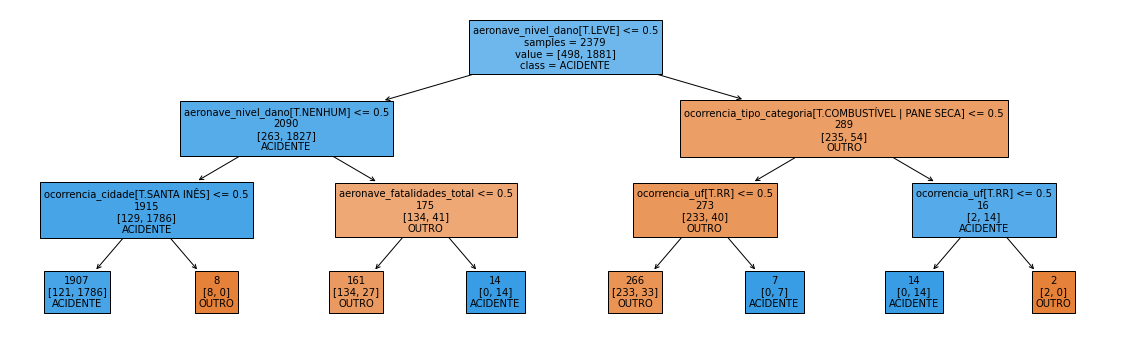

In [61]:
# Criando fórmula a ser utilizada no modelo preditivo e separando dados em conjunto de treino e teste
formula = "classif ~ 0 + " + " + ".join(x for x in df_pred.columns if x != "classif")
y, X = patsy.dmatrices(formula, data = df_pred)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.5, random_state = 42)
# Construindo árvore de classificação
ctree = tree.DecisionTreeClassifier(max_depth = 3)
ctree.fit(X_trn, y_trn)

fig.figure(figsize = (20, 6))
tree.plot_tree(ctree,
                feature_names = X.design_info.column_names,
                label = "root",
                class_names = {0: 'OUTRO', 1: 'ACIDENTE'},
                filled = True,
                impurity = False,
                fontsize = 10);

###### Nota-se que o Estado onde são observadas as ocorrências e o nível de dano da aeronave são duas variáveis de grande relevância para prever a forma como a ocorrêcia será classificada, uma vez que aparecem diversas vezes nos nós da árvore de classificação criada. Ademais, o grupo observou que a cidade apontada pela árvore de classifcação (Santa Inês) poderia ser motivo para poda da árvore, uma vez que tal cidade apresenta um número de ocorrências irrelevante ao estudo.

###### Medindo a eficiência do modelo

AUC da árvore de classificação= 0.87


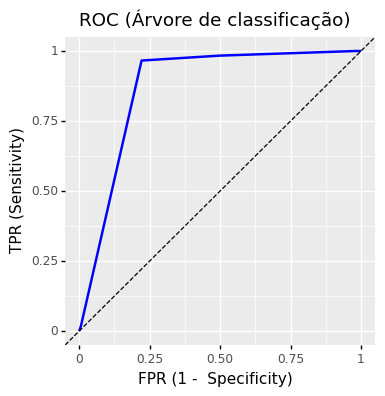

<ggplot: (138279998266)>

In [62]:
# Construindo curva ROC
prob_tree = ctree.predict_proba(X_tst)[:, 1]
fpr_tree, tpr_tree, threshold = roc_curve(y_tst, prob_tree)
# Calculando AUC do modelo
auc_tree = roc_auc_score(y_tst, prob_tree)
print('AUC da árvore de classificação=',round(auc_tree,2))
# Plotando curva ROC
(ggplot() +
     geom_line(aes(x = fpr_tree, y = tpr_tree), color = "blue", size = 1) +
     geom_abline(linetype = "dashed") +
     labs(x = "FPR (1 -  Specificity)", y = "TPR (Sensitivity)", title = "ROC (Árvore de classificação)") +
     theme(figure_size = (4, 4)))